In [ ]:
'''
【项目13】  社会财富分配问题模拟

一个财富分配游戏：
房间里有100个人，每人都有100元钱，他们在玩一个游戏。每轮游戏中，每个人都要拿出一元钱随机给另一个人，最后这100个人的财富分布是怎样的？

研究问题：
1、财富分配模型
模型假设：
① 每个人初始基金100元
② 从18岁到65岁，每天玩一次，简化运算按照一共玩17000轮
③ 每天拿出一元钱，并且随机分配给另一个人
④ 当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱
要求：
① 构建模型模拟（这里需要跑17000轮）
② 绘制柱状图，查看该轮财富情况
   ** 横轴标签代表一个玩家的编号，柱子的高低变动反映该玩家财富值的变化
   ** 制图分两个情况绘制：不排序绘制、每轮按照财富值排序绘制
   ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
   ** 100至1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
   ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
③ 查看最后财富分配数据是什么分布？
④ 最富有的人相比于初始财富，翻了多少倍？
⑤ 10%的人掌握着多少的财富？30%的人掌握着多少的财富？又有百分之多少人财富缩水至100元以下了？
提示：
① 首先，模拟第一轮游戏分配，不考虑某人财富值降到0元的情况
② 其次，仍然模拟第一轮游戏分配，但考虑某人的财富值降到0元时的情况
③ 构建模型
④ 运行模型，先试运行100条/1000条，再运行17000
⑤ 制图

2、在允许借贷情况下，研究以下问题
和初始模型的区别：
允许借贷意味着可以找亲友、银行、投资人借贷 → 资产为负时，仍然参与游戏
要求：
① 构建模型模拟，再次模拟财富分配情况
   ** 最富有的人相比于初始财富，翻了多少倍？
   ** 10%的人掌握着多少的财富？30%的人掌握着多少的财富？又有百分之多少人财富缩水至100元以下了？
② 绘制柱状图，查看该轮财富情况
   ** 横轴标签代表一个玩家的编号，柱子的高低变动反映该玩家财富值的变化
   ** 这里只需要每轮按照财富值排序绘制
   ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
   ** 100至1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
   ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
③ 游戏次数与财富分布的标准差的情况，绘图来表示
   ** 这里用允许借贷情况下模拟的结果
   ** 横坐标为游戏次数（总共17000次），纵坐标为财富分配标准差
   ** 绘制折线图
④ 玩家从18岁开始，在经过17年后为35岁，这个期间共进行游戏6200次左右，则此刻查看财富情况，将财富值为负的标记成“破产”，通过图表研究
   该类玩家在今后的游戏中能否成功“逆袭”（财富值从负到正为逆袭）、
   ** 这里绘制柱状图 → 6200至17000轮，按照每500轮绘制一次柱状图
提示：
① 该模型只需要将初始模型中，“财富小于零时无需拿钱给别人”的条件删掉即可
② 最后绘制柱状图时，需要将负债的玩家标红，这里可以通过截取dataframe之后，给与color字段来设置颜色

3、努力的人生会更好吗？
模型假设：
① 每个人初始基金仍为100元
② 一共玩17000轮
③ 每天拿出一元钱，并且随机分配给另一个人
④ 有10个人加倍努力，从而获得了1%的竞争优势
⑤ 允许借贷
允许借贷意味着可以找亲友、银行、投资人借贷 → 资产为负时，仍然参与游戏
要求：
① 构建模型模拟，再次模拟财富分配情况
② 努力的人，最后是否富有？
③ 绘制柱状图，查看该轮财富情况
   ** 横轴标签代表一个玩家的编号，柱子的高低变动反映该玩家财富值的变化
   ** 这里只需要每轮按照财富值排序绘制
   ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
   ** 100至1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
   ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
提示：
① 这里设置的10个人id分别为：[1,11,21,31,41,51,61,71,81,91]
② np.random.choice(person_n, p =[...]) → 这里通过设置p来修改概率：努力的10人概率为（1/100.1*1.01），其他人概率为（1/100.1）


'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

import time
# 导入时间模块

In [ ]:
'''
一个财富分配游戏：
房间里有100个人，每人都有100元钱，他们在玩一个游戏。每轮游戏中，每个人都要拿出一元钱随机给另一个人，最后这100个人的财富分布是怎样的？

1、财富分配模型
模型假设：
① 每个人初始基金100元
② 从18岁到65岁，每天玩一次，简化运算按照一共玩17000轮
③ 每天拿出一元钱，并且随机分配给另一个人
④ 当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱
要求：
① 构建模型模拟（这里需要跑17000轮）
② 绘制柱状图，查看该轮财富情况
   ** 横轴标签代表一个玩家的编号，柱子的高低变动反映该玩家财富值的变化
   ** 制图分两个情况绘制：不排序绘制、每轮按照财富值排序绘制
   ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
   ** 100至1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
   ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
③ 查看最后财富分配数据是什么分布？
④ 最富有的人相比于初始财富，翻了多少倍？
⑤ 10%的人掌握着多少的财富？30%的人掌握着多少的财富？又有百分之多少人财富缩水至100元以下了？
提示：
① 首先，模拟第一轮游戏分配，不考虑某人财富值降到0元的情况
② 其次，仍然模拟第一轮游戏分配，但考虑某人的财富值降到0元时的情况
③ 构建模型
④ 运行模型，先试运行100条/1000条，再运行17000
⑤ 制图

'''

In [2]:
# 1、财富分配模型测试
# 模型假设：
# ① 每个人初始基金100元
# ② 从18岁到65岁，每天玩一次，简化运算按照一共玩17000天
# ③ 每天拿出一元钱，并且随机分配给另一个人
# ④ 当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱
# （1） 模拟第一轮游戏分配
# 先不考虑某人财富值降到0元的情况

person_n = [x for x in range(1,101)]
fortune = pd.DataFrame([100 for i in range(100)], index = person_n)
fortune.index.name = 'id'
# 设定初始参数：游戏玩家100人，起始资金100元

round_r1 = pd.DataFrame({'pre_round':fortune[0],'lost':1})
# 设定第一轮分配财富之前的情况
choice_r1 = pd.Series(np.random.choice(person_n,100))      
gain_r1 = pd.DataFrame({'gain':choice_r1.value_counts()})                  
# 这一轮中每个人随机指定给“谁”1元钱，并汇总这一轮每个人的盈利情况
round_r1 = round_r1.join(gain_r1)
round_r1.fillna(0,inplace = True)
fortune[1] = round_r1['pre_round'] - round_r1['lost'] + round_r1['gain']
# 合并数据，得到这一轮每个人“盈亏”多少钱 → 得到这一轮财富分配的结果
fortune.head()

,0,1
id,,
1,100,101.0
2,100,101.0
3,100,99.0
4,100,100.0
5,100,99.0


In [3]:
# （2） 模拟第一轮游戏分配
# 考虑情况：当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱

person_n = [x for x in range(1,101)]
fortune = pd.DataFrame([100 for i in range(100)], index = person_n)
fortune.index.name = 'id'
# 设定初始参数：游戏玩家100人，起始资金100元

round_r1 = pd.DataFrame({'pre_round':fortune[0],'lost':0})
round_r1['lost'][round_r1['pre_round'] > 0] = 1
# 设定第一轮分配财富之前的情况 → 该轮财富值为0的不需要拿钱给别人
round_players = round_r1[round_r1['pre_round'] > 0]
# 筛选出参与游戏的玩家：财富值>0
choice_r1 = pd.Series(np.random.choice(person_n,len(round_players)))      
gain_r1 = pd.DataFrame({'gain':choice_r1.value_counts()})                  
# 这一轮中每个人随机指定给“谁”1元钱，并汇总这一轮每个人的盈利情况
round_r1 = round_r1.join(gain_r1)
round_r1.fillna(0,inplace = True)
fortune[1] = round_r1['pre_round'] - round_r1['lost'] + round_r1['gain']
# 合并数据，得到这一轮财富分配的结果
fortune.head()

,0,1
id,,
1,100,99.0
2,100,102.0
3,100,102.0
4,100,100.0
5,100,101.0


In [4]:
# （3）构建函数模型
# 这里注意：当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱

def game1(data, roundi):
    if len(data[data[roundi - 1] ==0]) > 0:   
    # 当数据包含财富值为0的玩家时
        round_i = pd.DataFrame({'pre_round':data[roundi-1],'lost':0})
        con = round_i['pre_round'] > 0
        round_i['lost'][con] = 1               # 设定每轮分配财富之前的情况 → 该轮财富值为0的不需要拿钱给别人
        round_players_i = round_i[con]         # 筛选出参与游戏的玩家：财富值>0
        choice_i = pd.Series(np.random.choice(person_n,len(round_players_i)))
        gain_i = pd.DataFrame({'gain':choice_i.value_counts()})     # 这一轮中每个人随机指定给“谁”1元钱，并汇总这一轮每个人的盈利情况
        round_i = round_i.join(gain_i)
        round_i.fillna(0,inplace = True)
        return round_i['pre_round'] -  round_i['lost'] + round_i['gain']
        # 合并数据，得到这一轮财富分配的结果
    else:
    # 当数据不包含财富值为0的玩家时
        round_i = pd.DataFrame({'pre_round':data[roundi-1],'lost':1}) # 设定每轮分配财富之前的情况
        choice_i = pd.Series(np.random.choice(person_n,100))
        gain_i = pd.DataFrame({'gain':choice_i.value_counts()})       # 这一轮中每个人随机指定给“谁”1元钱，并汇总这一轮每个人的盈利情况
        round_i = round_i.join(gain_i)
        round_i.fillna(0,inplace = True)
        return round_i['pre_round'] -  round_i['lost'] + round_i['gain']
        # 合并数据，得到这一轮财富分配的结果
print('finished!')

finished!


In [5]:
# （4）运行模型，模拟财富分配

person_n = [x for x in range(1,101)]
fortune = pd.DataFrame([100 for i in range(100)], index = person_n)
fortune.index.name = 'id'
# 设定初始参数：游戏玩家100人，起始资金100元

starttime = time.time()                     # 模型开始时间
for round in range(1,17001):
    fortune[round] = game1(fortune,round)   # 进行17000轮随机分配模拟
game1_result = fortune.T                    # 转置后得到结果数据 → 列为每一个人的id，行为每一轮的财富分配结果   
endtime = time.time()                       # 模型结束时间
print('模型总共用时%i秒' % (endtime - starttime))
# 计算时间

game1_result.tail()
# 查看最后5条数据

模型总共用时496秒


id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
16996,255.0,21.0,215.0,46.0,3.0,24.0,41.0,102.0,29.0,160.0,...,80.0,24.0,248.0,90.0,78.0,14.0,65.0,7.0,200.0,104.0
16997,255.0,22.0,214.0,45.0,2.0,24.0,40.0,102.0,30.0,159.0,...,81.0,24.0,248.0,92.0,77.0,13.0,64.0,9.0,200.0,103.0
16998,257.0,22.0,216.0,44.0,1.0,24.0,39.0,102.0,31.0,159.0,...,83.0,23.0,248.0,92.0,77.0,12.0,63.0,8.0,199.0,103.0
16999,258.0,21.0,215.0,43.0,2.0,24.0,40.0,103.0,30.0,158.0,...,83.0,22.0,247.0,92.0,78.0,13.0,64.0,8.0,198.0,103.0
17000,257.0,22.0,214.0,43.0,1.0,23.0,39.0,102.0,30.0,158.0,...,83.0,22.0,247.0,92.0,77.0,15.0,63.0,8.0,199.0,103.0


In [6]:
# （5）绘制柱状图
# ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
# ** 100至1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
# ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
# ① 不排序绘制

os.chdir('C:\\Users\\Hjx\\Desktop\\项目13社会财富分配问题模拟\\财富分配模型_初始模型_不排序绘制\\')

def graph1(data,start,end,length):
    for n in list(range(start,end,length)):
        datai = data.iloc[n]
        plt.figure(figsize = (10,6))
        plt.bar(datai.index,datai.values,color='gray',alpha = 0.8,width = 0.9)
        plt.ylim((0,400))
        plt.xlim((-10,110))
        plt.title('Round %d' % n)
        plt.xlabel('PlayerID')
        plt.ylabel('Fortune')
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.savefig('graph1_round_%d.png' % n, dpi=200)
# 创建绘图函数1

graph1(game1_result,0,100,10)
graph1(game1_result,100,1000,100)
graph1(game1_result,1000,17400,400)

print('finished!')

finished!


In [7]:
# （5）绘制柱状图
# ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
# ** 100至1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
# ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
# ② 每轮按照财富值排序绘制

os.chdir('C:\\Users\\Hjx\\Desktop\\项目13社会财富分配问题模拟\\财富分配模型_初始模型_排序绘制\\')

def graph2(data,start,end,length):
    for n in list(range(start,end,length)):
        datai = data.iloc[n].sort_values().reset_index()[n]
        plt.figure(figsize = (10,6))
        plt.bar(datai.index,datai.values,color='gray',alpha = 0.8,width = 0.9)
        plt.ylim((0,400))
        plt.xlim((-10,110))
        plt.title('Round %d' % n)
        plt.xlabel('PlayerID')
        plt.ylabel('Fortune')
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.savefig('graph2_round_%d.png' % n, dpi=200)
# 创建绘图函数2

graph2(game1_result,0,100,10)
graph2(game1_result,100,1000,100)
graph2(game1_result,1000,17400,400)

print('finished!')

finished!


In [8]:
# 一些结论

round_17000_1 = pd.DataFrame({'money':game1_result.iloc[17000]}).sort_values(by = 'money',ascending = False).reset_index()
round_17000_1['fortune_pre'] = round_17000_1['money'] / round_17000_1['money'].sum()
round_17000_1['fortune_cumsum'] = round_17000_1['fortune_pre'].cumsum()
round_17000_1.head()

# 最后一轮中，最富有的人财富值为365元，相比于初始财富，翻了3.65倍
# 10%的人掌握着28%的财富，20%的人掌握着51%的财富？
# 60%的人财富缩水至100元以下了？

,id,money,fortune_pre,fortune_cumsum
0,74,365.0,0.0365,0.0365
1,13,310.0,0.0310,0.0675
2,56,280.0,0.0280,0.0955
3,81,263.0,0.0263,0.1218
4,71,259.0,0.0259,0.1477


In [ ]:
'''
2、在允许借贷情况下，研究以下问题
和初始模型的区别：
允许借贷意味着可以找亲友、银行、投资人借贷 → 资产为负时，仍然参与游戏
要求：
① 构建模型模拟，再次模拟财富分配情况
   ** 最富有的人相比于初始财富，翻了多少倍？
   ** 10%的人掌握着多少的财富？30%的人掌握着多少的财富？又有百分之多少人财富缩水至100元以下了？
② 绘制柱状图，查看该轮财富情况
   ** 横轴标签代表一个玩家的编号，柱子的高低变动反映该玩家财富值的变化
   ** 这里只需要每轮按照财富值排序绘制
   ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
   ** 100至1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
   ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
③ 游戏次数与财富分布的标准差的情况，绘图来表示
   ** 这里用允许借贷情况下模拟的结果
   ** 横坐标为游戏次数（总共17000次），纵坐标为财富分配标准差
   ** 绘制折线图
④ 玩家从18岁开始，在经过17年后为35岁，这个期间共进行游戏6200次左右，则此刻查看财富情况，将财富值为负的标记成“破产”，通过图表研究
   该类玩家在今后的游戏中能否成功“逆袭”（财富值从负到正为逆袭）、
   ** 这里绘制柱状图 → 6200至17000轮，按照每500轮绘制一次柱状图
提示：
① 该模型只需要将初始模型中，“财富小于零时无需拿钱给别人”的条件删掉即可
② 最后绘制柱状图时，需要将负债的玩家标红，这里可以通过截取dataframe之后，给与color字段来设置颜色

'''

In [9]:
# （1）构建函数模型
# 这里注意：当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱

def game2(data, roundi):
    round_i = pd.DataFrame({'pre_round':data[roundi-1],'lost':1}) # 设定每轮分配财富之前的情况
    choice_i = pd.Series(np.random.choice(person_n,100))
    gain_i = pd.DataFrame({'gain':choice_i.value_counts()})       # 这一轮中每个人随机指定给“谁”1元钱，并汇总这一轮每个人的盈利情况
    round_i = round_i.join(gain_i)
    round_i.fillna(0,inplace = True)
    return round_i['pre_round'] -  round_i['lost'] + round_i['gain']
    # 合并数据，得到这一轮财富分配的结果
print('finished!')

finished!


In [10]:
# （2）运行模型，模拟财富分配

person_n = [x for x in range(1,101)]
fortune = pd.DataFrame([100 for i in range(100)], index = person_n)
fortune.index.name = 'id'
# 设定初始参数：游戏玩家100人，起始资金100元

starttime = time.time()                     # 模型开始时间
for round in range(1,17001):
    fortune[round] = game2(fortune,round)   # 进行17000轮随机分配模拟
game2_result = fortune.T                    # 转置后得到结果数据 → 列为每一个人的id，行为每一轮的财富分配结果   
endtime = time.time()                       # 模型结束时间
print('模型总共用时%i秒' % (endtime - starttime))
# 计算时间

game2_result.tail()
# 查看最后5条数据

模型总共用时81秒


id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
16996,220.0,270.0,180.0,38.0,297.0,173.0,161.0,57.0,289.0,188.0,...,121.0,33.0,425.0,-43.0,219.0,182.0,184.0,214.0,399.0,158.0
16997,219.0,272.0,180.0,39.0,299.0,172.0,160.0,58.0,291.0,187.0,...,122.0,33.0,426.0,-43.0,219.0,182.0,187.0,214.0,398.0,161.0
16998,218.0,272.0,180.0,40.0,298.0,173.0,160.0,58.0,291.0,186.0,...,121.0,32.0,425.0,-43.0,218.0,181.0,186.0,215.0,398.0,161.0
16999,220.0,272.0,180.0,39.0,297.0,172.0,159.0,59.0,290.0,185.0,...,123.0,33.0,424.0,-43.0,217.0,182.0,185.0,216.0,399.0,160.0
17000,220.0,271.0,181.0,39.0,297.0,171.0,160.0,59.0,289.0,187.0,...,122.0,34.0,424.0,-44.0,216.0,184.0,185.0,215.0,398.0,160.0


In [12]:
# 一些结论

round_17000_2 = pd.DataFrame({'money':game2_result.iloc[17000]}).sort_values(by = 'money',ascending = False).reset_index()
round_17000_2['fortune_pre'] = round_17000_2['money'] / round_17000_2['money'].sum()
round_17000_2['fortune_cumsum'] = round_17000_2['fortune_pre'].cumsum()
round_17000_2.head()

# 最后一轮中，最富有的人财富值为458元，相比于初始财富，翻了4.58倍
# 10%的人掌握着33%的财富，20%的人掌握着59%的财富？
# 50%的人财富缩水至100元以下了？

,id,money,fortune_pre,fortune_cumsum
0,93,424.0,0.0424,0.0424
1,99,398.0,0.0398,0.0822
2,80,367.0,0.0367,0.1189
3,90,307.0,0.0307,0.1496
4,5,297.0,0.0297,0.1793


In [13]:
# （3）游戏次数与财富分布的标准差的情况，绘图来表示

os.chdir('C:\\Users\\Hjx\\Desktop\\项目13社会财富分配问题模拟\\财富分配模型_允许借贷\\')

def graph3(data,start,end,length):
    for n in list(range(start,end,length)):
        datai = data.iloc[n].sort_values().reset_index()[n]
        plt.figure(figsize = (10,6))
        plt.bar(datai.index,datai.values,color='gray',alpha = 0.8,width = 0.9)
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.ylim((-200,400))
        plt.xlim((-10,110))
        plt.title('Round %d' % n)
        plt.xlabel('PlayerID')
        plt.ylabel('Fortune')
        plt.savefig('graph3_round_%d.png' % n, dpi=200)
# 创建绘图函数2

graph3(game2_result,0,100,10)
graph3(game2_result,100,1000,100)
graph3(game2_result,1000,17400,400)

print('finished!')

finished!


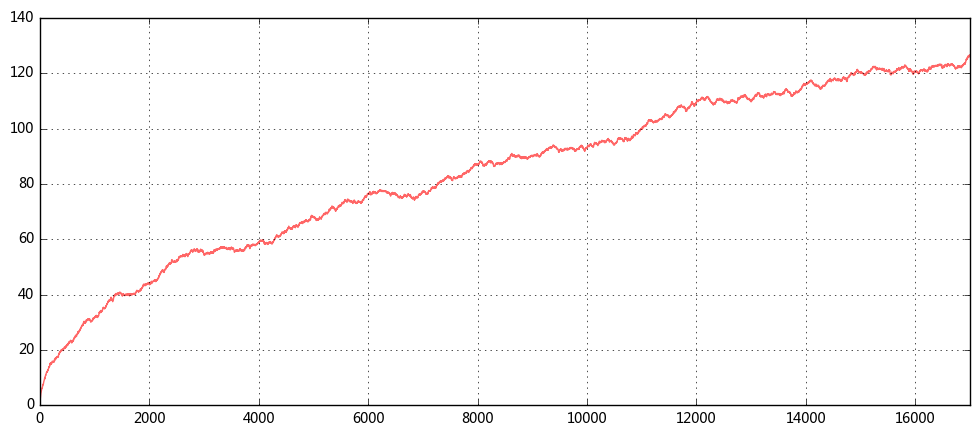

In [16]:
# （4）游戏次数与财富分布的标准差的情况，绘图来表示

game2_st = game2_result.std(axis = 1)
game2_st.plot(figsize = (12,5),color = 'red',alpha = 0.6,grid = True)
plt.show()

# 游戏早期前2000轮的标准差变动最为激烈；
# 而在6000-6500轮游戏后，标准差的变化趋于平缓，但仍在上升；
# 按照我们设定的游戏与人生的对应规则，这时玩家年龄为35岁

财富值为负的玩家id为：
 [14, 63, 54, 42, 69, 18, 40, 21, 33, 6, 66]


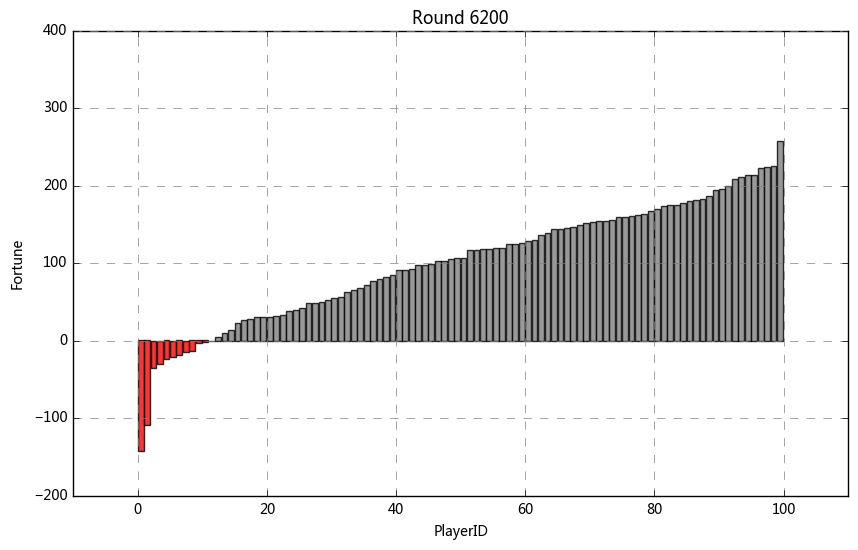

In [17]:
# （5）玩家从18岁开始，在经过17年后为35岁，这个期间共进行游戏6200次左右，则此刻查看财富情况，将财富值为负的标记成“破产
# 通过图表研究该类玩家在今后的游戏中能否成功“逆袭”（财富值从负到正为逆袭）、
# 这里绘制折线图

game2_round6200 = pd.DataFrame({'money':game2_result.iloc[6200].sort_values().reset_index()[6200],
                                'id':game2_result.iloc[6200].sort_values().reset_index()['id'],
                                'color':'gray'})
game2_round6200['color'][game2_round6200['money'] < 0] = 'red'
id_pc = game2_round6200['id'][game2_round6200['money'] < 0].tolist()
print('财富值为负的玩家id为：\n',id_pc)
# 筛选数据
# 设置颜色参数

plt.figure(figsize = (10,6))
plt.bar(game2_round6200.index,game2_round6200['money'],color = game2_round6200['color'],alpha = 0.8,width = 0.9)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.ylim((-200,400))
plt.xlim((-10,110))
plt.title('Round 6200')
plt.xlabel('PlayerID')
plt.ylabel('Fortune')
plt.show()
# 绘制柱状图

In [18]:
# 绘图分析

os.chdir('C:\\Users\\Hjx\\Desktop\\项目13社会财富分配问题模拟\\财富分配模型_允许借贷_负债玩家逆袭\\')

def graph4(data,start,end,length):
    for n in list(range(start,end,length)):
        datai = pd.DataFrame({'money':data.iloc[n],'color':'gray'})
        datai['color'].loc[id_pc] = 'red'
        datai = datai.sort_values(by = 'money').reset_index()
        plt.figure(figsize = (10,6))
        plt.bar(datai.index,datai['money'],color=datai['color'],alpha = 0.8,width = 0.9)
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.ylim((-200,400))
        plt.xlim((-10,110))
        plt.title('Round %d' % n)
        plt.xlabel('PlayerID')
        plt.ylabel('Fortune')
        plt.savefig('graph4_round_%d.png' % n, dpi=200)
# 创建绘图函数2

graph4(game2_result,6200,17000,500)

print('finished!')

# 结论
# 以35岁为界，虽然破产以后，不足一半的概率回复到普通人的生活，但想要逆袭暴富，却是相当困难的

finished!


In [ ]:
'''
3、努力的人生会更好吗？
模型假设：
① 每个人初始基金仍为100元
② 一共玩17000轮
③ 每天拿出一元钱，并且随机分配给另一个人
④ 有10个人加倍努力，从而获得了1%的竞争优势
⑤ 允许借贷
允许借贷意味着可以找亲友、银行、投资人借贷 → 资产为负时，仍然参与游戏
要求：
① 构建模型模拟，再次模拟财富分配情况
② 努力的人，最后是否富有？
③ 绘制柱状图，查看该轮财富情况
   ** 横轴标签代表一个玩家的编号，柱子的高低变动反映该玩家财富值的变化
   ** 这里只需要每轮按照财富值排序绘制
   ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
   ** 100至1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
   ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
提示：
① 这里设置的10个人id分别为：[1,11,21,31,41,51,61,71,81,91]
② np.random.choice(person_n, p =[...]) → 这里通过设置p来修改概率：努力的10人概率为0.0101，其他人概率为（0.899/90）

'''

In [19]:
# （1）构建函数模型
# 这里注意：当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱

person_p = [0.899/90 for i in range(100)]
for i in [1,11,21,31,41,51,61,71,81,91]:
    person_p[i-1] = 0.0101
# 设置概率

def game3(data, roundi):
    round_i = pd.DataFrame({'pre_round':data[roundi-1],'lost':1}) # 设定每轮分配财富之前的情况
    choice_i = pd.Series(np.random.choice(person_n,100, p = person_p))
    gain_i = pd.DataFrame({'gain':choice_i.value_counts()})       # 这一轮中每个人随机指定给“谁”1元钱，并汇总这一轮每个人的盈利情况
    round_i = round_i.join(gain_i)
    round_i.fillna(0,inplace = True)
    return round_i['pre_round'] -  round_i['lost'] + round_i['gain']
    # 合并数据，得到这一轮财富分配的结果
print('finished!')

finished!


In [20]:
# （2）运行模型，模拟财富分配

person_n = [x for x in range(1,101)]
fortune = pd.DataFrame([100 for i in range(100)], index = person_n)
fortune.index.name = 'id'
# 设定初始参数：游戏玩家100人，起始资金100元

starttime = time.time()                     # 模型开始时间
for round in range(1,17001):
    fortune[round] = game3(fortune,round)   # 进行17000轮随机分配模拟
game3_result = fortune.T                    # 转置后得到结果数据 → 列为每一个人的id，行为每一轮的财富分配结果   
endtime = time.time()                       # 模型结束时间
print('模型总共用时%i秒' % (endtime - starttime))
# 计算时间

game3_result.tail()
# 查看最后5条数据

模型总共用时84秒


id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
16996,430.0,134.0,-48.0,190.0,-50.0,-13.0,-50.0,49.0,-88.0,271.0,...,-7.0,317.0,-1.0,168.0,137.0,88.0,90.0,126.0,56.0,227.0
16997,430.0,135.0,-49.0,190.0,-50.0,-14.0,-51.0,51.0,-86.0,271.0,...,-8.0,318.0,3.0,168.0,137.0,88.0,89.0,125.0,56.0,227.0
16998,431.0,134.0,-47.0,190.0,-50.0,-13.0,-50.0,51.0,-86.0,271.0,...,-8.0,317.0,2.0,167.0,139.0,87.0,89.0,125.0,55.0,227.0
16999,431.0,134.0,-46.0,190.0,-46.0,-14.0,-50.0,51.0,-85.0,271.0,...,-8.0,320.0,2.0,168.0,139.0,86.0,89.0,125.0,54.0,226.0
17000,433.0,134.0,-46.0,190.0,-46.0,-14.0,-51.0,50.0,-86.0,271.0,...,-9.0,322.0,2.0,168.0,139.0,87.0,88.0,125.0,55.0,225.0


In [21]:
# 绘图分析

os.chdir('C:\\Users\\Hjx\\Desktop\\项目13社会财富分配问题模拟\\财富分配模型_努力人生\\')

plt.figure(figsize = (10,6))
data0 = pd.DataFrame({'money':game3_result.iloc[0],'color':'gray'})
data0['color'].loc[[1,11,21,31,41,51,61,71,81,91]] = 'red'
plt.bar(data0.index,data0['money'],color=data0['color'],alpha = 0.8,width = 0.9)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.ylim((-200,400))
plt.xlim((-10,110))
plt.title('Round %d' % 0)
plt.xlabel('PlayerID')
plt.ylabel('Fortune')
plt.savefig('graph5_round_%d.png' % 0, dpi=200)
# 绘制起始图片

def graph5(data,start,end,length):
    for n in list(range(start,end,length)):
        datai = pd.DataFrame({'money':data.iloc[n],'color':'gray'})
        datai['color'].loc[[1,11,21,31,41,51,61,71,81,91]] = 'red'
        datai = datai.sort_values(by = 'money').reset_index()
        plt.figure(figsize = (10,6))
        plt.bar(datai.index,datai['money'],color=datai['color'],alpha = 0.8,width = 0.9)
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.ylim((-200,400))
        plt.xlim((-10,110))
        plt.title('Round %d' % n)
        plt.xlabel('PlayerID')
        plt.ylabel('Fortune')
        plt.savefig('graph5_round_%d.png' % n, dpi=200)
# 创建绘图函数2

graph5(game3_result,10,100,10)
graph5(game3_result,100,1000,100)
graph5(game3_result,1000,17400,400)

print('finished!')

# 结论
# 社会财富的总体分布形态没有什么变化
# 10位努力玩家中多位都进入了富人top20！

finished!
